In [1]:
from sqlalchemy import create_engine
import pandas as pd 
import numpy as np
mysql_setting = {
    'host' : "localhost",
    'dbname': "spider",
    'user': "root",
    'password': ""
}

def getDatabaseConn():
    engine = create_engine('mysql://{user}:{password}@{host}:3306/{dbname}'.format(**mysql_setting), echo=False)
    conn = engine.connect()
    return conn
conn = getDatabaseConn()

In [11]:
sql_zhilian_position_info = '''
    select company_md5, position_name, salary_low, salary_high, work_year, education, recruit_num from zhilian_position
'''
sql_51job_position_info = '''
    select company_md5, name, salary, education, recruit_num from 51job_position
'''


In [13]:
sql_zhilian_company_info = '''
    select 
        company_md5, full_name, size, company_nature, industry
    from zhilian_company
'''
sql_51job_company_info = '''
    select 
        company_md5, full_name, size, company_nature, industry
    from 51job_company
'''
zc_df = pd.read_sql(sql_zhilian_company_info, conn)
j5c_df = pd.read_sql(sql_51job_company_info, conn)

In [14]:
res_zp = pd.merge(zp_df, zc_df, on='company_md5', how='left')
res_j5 = pd.merge(j5_df, j5c_df, on='company_md5', how='left')

In [65]:
res_zp_g = res_zp.groupby('full_name').size().sort_values(ascending=False).to_frame().rename(columns={0:'position_num'})
pd.concat([zc_df.set_index('full_name'), res_zp_g], axis=1).sort_values('position_num', ascending=False)[:60]

,company_md5,size,company_nature,industry,position_num
上海埃摩森资产管理中心(有限合伙),25407e8ae336dbbe80cb88c4e9f70163,1000-9999人,民营,专业服务/咨询(财会/法律/人力资源等),4360.0
长春市利嘉商务信息咨询有限公司,f2c9f3fbd25752b4dd75221b358f5246,20-99人,民营,专业服务/咨询(财会/法律/人力资源等),2309.0
弘历软件,2e2e4af28daafa874a9aea09d7e1529f,500-999人,民营,计算机软件,1722.0
青岛达内软件科技有限公司,76a867b112fdf001049bca919bff51ed,1000-9999人,上市公司,计算机软件,1527.0
武汉创搜信息技术有限公司,068b45b5d74dc60f614d5c47758796f2,100-499人,合资,计算机软件,1303.0
太平人寿保险有限公司天门支公司,4b1692a4fedac8fee21fc0ad43ad8260,10000人以上,国企,保险,1241.0
上海沃锐商务咨询中心(有限合伙),7a9748a9934d8dac613c327f42d6b803,500-999人,民营,专业服务/咨询(财会/法律/人力资源等),1184.0
合肥德伟商贸有限公司,ff84246dfb15b85a98ab6d88ebe56a7e,500-999人,上市公司,专业服务/咨询(财会/法律/人力资源等),1176.0
济南阿甲信息科技有限公司,956a795c807bde285a27ef47f6697658,10000人以上,外商独资,互联网/电子商务,1118.0
南京达内为上培训学校,ff4a43fdb8188a34ba34efd10f06488f,1000-9999人,上市公司,计算机软件,1047.0


In [114]:
res_j5_g = res_j5.groupby('full_name').size()
res_j5_g = pd.DataFrame(list(zip(res_j5_g.index, res_j5_g.values))).rename(columns={0:'full_name', 1:"total_recruit_num"})
res_total = pd.merge(j5c_df, res_j5_g, on='full_name', how='left').sort_values('total_recruit_num', ascending=False)[:100]

In [119]:
sql_we_zhilian = '''
    select salary_low, salary_high, work_year, education from zhilian_position
'''
sql_we_j5 = '''
    select salary, work_year, education from 51job_position
'''
we_zhilian_df = pd.read_sql(sql_we_zhilian, conn)
we_j5_df = pd.read_sql(sql_we_zhilian, conn)

In [126]:
we_zhilian_g = we_zhilian_df.groupby('work_year')
we_j5_g = we_j5_df.groupby('work_year')

In [141]:
res_j5_workyear = we_j5_g.size().sort_values(ascending=False)[:7]

# 不同工作年限，职位招聘数比重

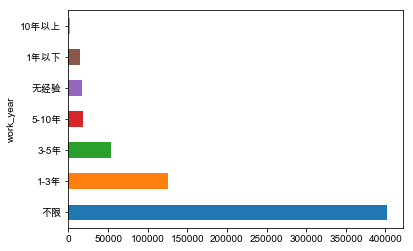

In [146]:
res_j5_workyear.plot(kind='barh', stacked=True)
import matplotlib.pyplot as plt
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
plt.show()

In [2]:
sql_lagou_work_year = '''
    select salary, work_year, education, city from lagou_recruit_day
'''
res_lagou_work_year = pd.read_sql(sql_lagou_work_year, conn)

In [149]:
res_lagou_work_year.groupby('work_year').size().sort_values(ascending=False)

work_year
1-3年     35875
不限       24778
3-5年     24365
5-10年     6839
1年以下      2661
10年以上      274
应届毕业生      249
1-3          1
dtype: int64

In [46]:
# res_salary = ls_df.groupby(['salary', 'education', 'work_year']).size().sort_values(ascending=False).to_frame()
def salarySplit(line):
    import re
    res = re.match(r'([\d]+)K-([\d]+)K', line)
    if not res:
        res = re.match(r'([\d]+)k-([\d]+)k', line)
    if res:
        salary_low = res[1]
        salary_high = res[2]
        salary_mean = (int(salary_low) + int(salary_high)) / 2
    else:
        res = re.match(r'([\d]+).*', line)
        salary_low = res[1]
        salary_high = res[1]
        salary_mean = res[1]
    return pd.Series([salary_low, salary_high, salary_mean])
temp = res_lagou_work_year['salary'].apply(salarySplit)
temp.mean()

0    inf
1    inf
dtype: float64

In [4]:
tmp = temp.rename(columns={0:'salary_low', 1:'salary_high', 2:'salary_mean'})
# tmp_count = tmp.salary_mean = pd.DataFrame([tmp.groupby('salary_mean').size().index, tmp.groupby('salary_mean').size().values]).T.rename(columns={0:'salary_mean',1:'num'})
# tmp_count.salary_mean = tmp_count.salary_mean.apply(int)
# # tmp_count = tmp_count[tmp_count.salary_mean < 20]
# tmp_count.sort_values('salary_mean', ascending=False)
# import matplotlib.pyplot as plt
# plt.plot(tmp_count.salary_mean, tmp_count.num, linewidth = 1)
# plt.show()

In [5]:
res_combine = res_lagou_work_year.combine_first(tmp)
res_combine.work_year = res_combine.work_year.apply(lambda x: x + '年' if x == '1-3' else x)

In [7]:
# pd.pivot_table(res_combine, index=['work_year', 'education'])
# res_combine.groupby(['work_year', 'education']).describe()
res_combine.head()

,city,education,salary,salary_high,salary_low,salary_mean,work_year
0,安庆,不限,3K-6K,6.0,3.0,4.5,不限
1,安庆,不限,3K-6K,6.0,3.0,4.5,不限
2,安庆,大专,3K-6K,6.0,3.0,4.5,不限
3,安庆,大专,3K-6K,6.0,3.0,4.5,不限
4,安庆,大专,3K-6K,6.0,3.0,4.5,不限


In [39]:
import matplotlib.pyplot as plt
pd.DataFrame(res_combine, columns=['salary_mean']).groupby('salary_mean').size().describe()

count     107.000000
mean      888.242991
std      1719.817036
min         1.000000
25%         5.000000
50%        46.000000
75%       711.000000
max      7621.000000
dtype: float64

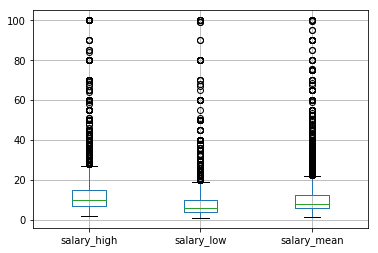

In [44]:
df_filter = pd.DataFrame(res_combine, columns=['salary_high', 'salary_low', 'salary_mean'])
df_filter.boxplot()
plt.show()

In [45]:
df_filter.describe()

,salary_high,salary_low,salary_mean
count,95042.000000,95042.000000,95042.000000
mean,13.027546,7.627975,10.327760
std,9.113911,5.365294,7.170895
min,2.000000,1.000000,1.500000
25%,7.000000,4.000000,6.000000
50%,10.000000,6.000000,8.000000
75%,15.000000,10.000000,12.500000
max,100.000000,100.000000,100.000000


In [11]:
city_recruit_num_df = pd.read_sql('SELECT city_name, total_num FROM spider.lagou_city order by total_num desc limit 30', conn)
city_recruit_num_df.to_excel('/Users/monstar/Desktop/city_recruit_num.xlsx')